# **Part A**
# **Final Portfolio Project**

### **YOLOv3 Object Detector with Darknet**

**Submitted by:**

Nikita Gaurihar - NUID: 002980962

Anshuman Karan - NUID: 001091491

# **Abstract:**
With each passing day, machine learning applications are improving in accuracy. Availability of huge datasets combined with strategies like pattern recognition, object detection, Recommendation Engine are showing exponentially better results compared to previous years. As world is getting used to data-oriented applications, traditional methods in areas like surveillance becoming obsolete and costly. Traditionally, we use CCTV for surveillance, and we need a human proctor to monitor the abnormal activities. This project aims to produce a robust real-time application that helps in detection and identification of all instances of various objects in the image, video, or live streaming through webcam. The algorithms related to this study such as Darknet, YoloV4, etc. will be implemented using python programming. Furthermore, as an extension, the custom object detection with 2 new labels -'Headphones' and 'Mask' was being implemented. 

**Keywords**: Object Detection, YOLO V4, Darknet, Data Annotation, Data Annotation, etc.

**Dataset Details:**
The famous TensorFlow’s COCO dataset with 91 classes. The link to the dataset is as follows – 
https://www.tensorflow.org/datasets/catalog/coco



# **Step 1: Enabling GPU-**
GPU is used when higher computational power is required. For Deep Learning applications, where simultaneous operations are performed, computational complexity increases. With the help of GPU, the distribution of training process significantly scales up the machine learning operations. 
Following settings are need to be done before we start training our model.

Go to **Runtime** --> **Change Runtime Type** --> Select **Hardware Accelerator** : **GPU**



# **Step 2: Importing necessary Libraries**

In [1]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

# **Step 3: Setting up Darknet**
* To implement YoloV3, we need to first implement Darknet framework. This can be done by cloning the darknet repository. 
* We can clone either pjreddie’s Git or AlexyAB’s Git. Here I am using, AlexyAB’s GitHub repository.
* Since Darknet is fast, readily available via GitHub and supports CPU & GPU computation, it is widely used in image and object classification with number of classes as high as 1000.

In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15379, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15379 (delta 0), reused 1 (delta 0), pack-reused 15378
Receiving objects: 100% (15379/15379), 14.01 MiB | 13.62 MiB/s, done.
Resolving deltas: 100% (10341/10341), done.


# **Step 4: Made changes in the makefile to enable OPENCV and GPU**

1. The deep neural network modules in OpenCV allow you to-
* load a pre-trained network from disk
* perform predictions on an input image, and
* show the results, allowing you to create your own customised computer vision pipeline. 

2. changing makefile to have GPU and OPENCV enabled

In [3]:
# change makefile to have GPU, OPENCV and LIBSO enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


### **Below command is used to compile and build darknet to use the darknet executable file to train object detector model**

In [4]:
# make darknet (builds darknet so that you can then use the darknet.py file and have its dependencies)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

### **Interpretation** : 
* In the darknet directory, now we will get a config file for Yolo in 'cfg' Subdirectory 
* The neural network model architecture is stored in the yolov3.cfg file, and the pre-trained weights of the neural network are stored in yolov3.weights
* The list of 80 object class that the model will be detecting is mentioned in a file called coco.names. 
* The model has been trained only on these 80 object classes.

# **Step 5: Downloading pre-trained weights:**

* YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. Using these pretrained weights so that we can run YOLOv4 on these pretrained classes and get detections.

* This step downloads the weights for the convolutional layers of the YOLOv4 network. 



In [5]:
# get bthe scaled yolov4 weights file that is pre-trained to detect 80 classes (objects) from shared google drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq" -O yolov4-csp.weights && rm -rf /tmp/cookies.txt

--2021-12-17 20:14:51--  https://docs.google.com/uc?export=download&confirm=ADkc&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq
Resolving docs.google.com (docs.google.com)... 74.125.135.113, 74.125.135.100, 74.125.135.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.135.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-6g-docs.googleusercontent.com/docs/securesc/islqi9cj4qp2v6gaac3e4v6hfc57nh5j/62g5viutfrvbv1g74ueatn53pvkjn9q7/1639772025000/17800843676226924807/01580188956130971378Z/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download [following]
--2021-12-17 20:14:51--  https://doc-14-6g-docs.googleusercontent.com/docs/securesc/islqi9cj4qp2v6gaac3e4v6hfc57nh5j/62g5viutfrvbv1g74ueatn53pvkjn9q7/1639772025000/17800843676226924807/01580188956130971378Z/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download
Resolving doc-14-6g-docs.googleusercontent.com (doc-14-6g-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting

# **Step 6: Running the model**
To implement YoloV3 with Darknet framework in Python, the following pre-built function will be used 

In [6]:
# import darknet functions to perform object detections
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("cfg/yolov4-csp.cfg", "cfg/coco.data", "yolov4-csp.weights")
width = network_width(network)
height = network_height(network)

# darknet helper function to run detection on image
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # get image ratios to convert bounding boxes to proper size
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # run model on darknet style image to get detections
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# **Step 7: Running the detections on test image**

---



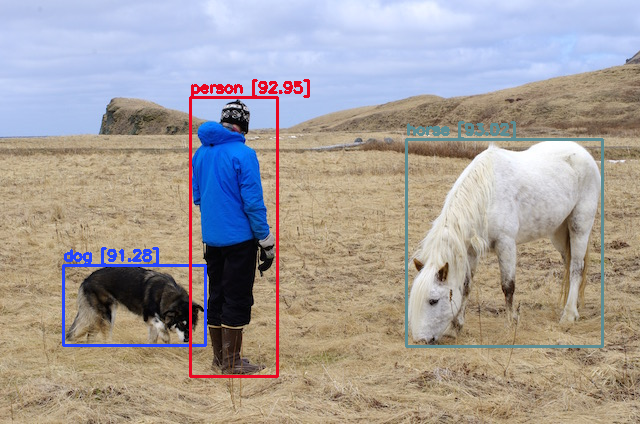

In [7]:
# run test on person.jpg image that comes with repository
image = cv2.imread("data/person.jpg")
detections, width_ratio, height_ratio = darknet_helper(image, width, height)

for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  cv2.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
  cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)
cv2_imshow(image)

## **Step 8: Defining Helper Functions:**
* To take images via Webcam and detect the objects
* Using javascript to convert the bounding boxes to string.



In [8]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

## **Demonstration: YOLOv4 on Wecam Images**
Below is a function to take the webcam picture using JavaScript and then run YOLOv4 on it.

In [9]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  
  # call our darknet helper on webcam image
  detections, width_ratio, height_ratio = darknet_helper(img, width, height)

  # loop through detections and draw them on webcam image
  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(img, (left, top), (right, bottom), class_colors[label], 2)
    cv2.putText(img, "{} [{:.2f}]".format(label, float(confidence)),
                      (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                      class_colors[label], 2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


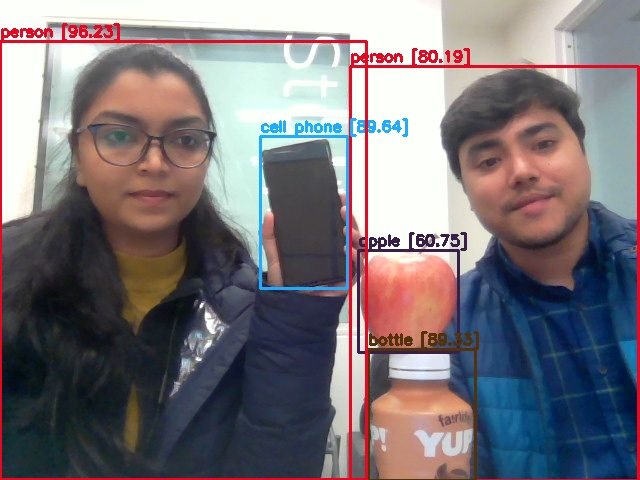

In [14]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **Conclusion:**

* After implementing YoloV3 using Darknet framework on TensorFlow’s COCO dataset using pretrained models, the model can classify the objects shown in image taken via web cam with the accuracy mentioned above the respective bounding box.

* We found that the yolo model used in this is successful to identify the classes labeled in the COCO dataset with accuracy of objects as mentioned below – 
 
      Person 1 – 96.23

      Person 2 – 89.31

      Bottle – 66.39

      Cell Phone – 78.43

      Apple – 81.47



Thank you